# param_estim_4lump.py

### This python script is design to estimate four parameters when solving a set of three ODE. <br>The ODE solution should be similar to the experimental values. <br>The main goal is to compute the weight fraction of the differents composants during the chimical reaction according to the time or the conversion. <br>This code was written by Clement Brousse (clbrous@okstate.edu). <br>Some part of this code are adapted from Dr. Versypt (Oklahoma State University) code. <br>

## The input for this code are :

### The experimental values

In [42]:
# Import the data
tdata = np.array([1/60, 1/30, 1/20, 1/10])
cdata = np.array([0.4926, 0.6204, 0.7118, 0.8238])
ydata = np.array([[0.5074, 0.3796, 0.2882, 0.1762],[0.3767, 0.4385, 0.4865, 0.5416],[0.0885, 0.136, 0.1681, 0.2108],[ 0.0274, 0.0459, 0.0572, 0.0714]])

### The parameters guesses 

In [ ]:
# Guess for the parameters
k = np.zeros((5,1))
k[0] = 1               # k_12
k[1] = 0               # k_13
k[2] = 0               # k_14
k[3] = 0               # k_23
k[4] = 0               # k_24

### The initial conditons

In [ ]:
# Initial conditions
y0 = np.zeros((4,1))
y0[0] = 1               # y_1
y0[1] = 0               # y_2
y0[2] = 0               # y_3
y0[3] = 0               # y_4

## The output for this code are :

### The computed parameters

In [40]:
print(' The parameters computed are :\n k_12 = ', parametersoln[0], '\n k_13 = ', parametersoln[1],'\n k_14 = ', parametersoln[2],'\n k_23 = ', parametersoln[3],'\n k_24 = ', parametersoln[4])

 The parameters computed are :
 k_12 =  38.98367907031659 
 k_13 =  9.998673480066195 
 k_14 =  3.1211829845819348 
 k_23 =  1.313842952484009 
 k_24 =  0.6512342913034368


### The covariance

In [41]:
print('\n The covariance is array is : \n', pcov)


 The covariance is array is : 
 [[ 2.46424514 -0.17984988 -0.29506762  0.26521872  0.23601352]
 [-0.17984988  1.55535318 -0.44990207 -0.61792867  0.2584277 ]
 [-0.29506762 -0.44990207  1.43629685  0.28256616 -0.62097623]
 [ 0.26521872 -0.61792867  0.28256616  0.36303764 -0.17331066]
 [ 0.23601352  0.2584277  -0.62097623 -0.17331066  0.36366022]]


### The plot of the Weight fraction according to the time

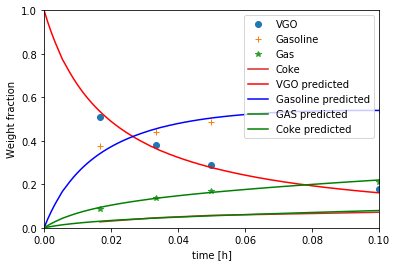

In [35]:
plt.plot(tdata, ydata[0,:], 'o')
plt.plot(tdata, ydata[1,:], '+')
plt.plot(tdata, ydata[2,:], '*')
plt.plot(tdata, ydata[3,:], '-')
tforPloting = np.linspace(0, tdata[-1]+1, 1001)
y_calculated = four_lump_sol(tforPloting,*parametersoln)
y_calculated = np.reshape (y_calculated, (numYaxisVariables, tforPloting.size))
plt.plot(tforPloting, y_calculated [0,:], 'r-', label = 'y_1 predicted')
plt.plot(tforPloting, y_calculated [1,:], 'b-', label = 'y_2 predicted')
plt.plot(tforPloting, y_calculated [2,:], 'g-', label = 'y_3 predicted')
plt.plot(tforPloting, y_calculated [3,:], 'g-', label = 'y_4 predicted')
plt.legend(('VGO', 'Gasoline', 'Gas', 'Coke', 'VGO predicted', 'Gasoline predicted', 'GAS predicted', 'Coke predicted'))
axes = plt.gca()
axes.set_xlim([0,0.1])
axes.set_ylim([0,1])
plt.xlabel('time [h]')
plt.ylabel('Weight fraction')
plt.show()

### The plot of the Weight fraction according to the conversion

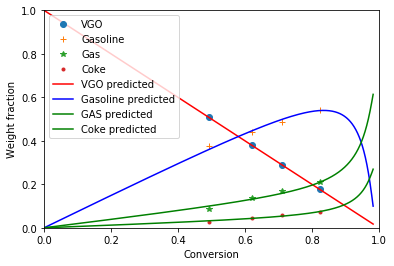

In [36]:
plt.plot(cdata, ydata[0,:], 'o')
plt.plot(cdata, ydata[1,:], '+')
plt.plot(cdata, ydata[2,:], '*')
plt.plot(cdata, ydata[3,:], '.')
cforPloting = 1-y_calculated[0,:]
plt.plot(cforPloting, y_calculated [0,:], 'r-')
plt.plot(cforPloting, y_calculated [1,:], 'b-')
plt.plot(cforPloting, y_calculated [2,:], 'g-')
plt.plot(cforPloting, y_calculated [3,:], 'g-')
plt.legend(('VGO', 'Gasoline', 'Gas', 'Coke', 'VGO predicted', 'Gasoline predicted', 'GAS predicted', 'Coke predicted'))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.xlabel('Conversion')
plt.ylabel('Weight fraction')
plt.show()

## This is the equations soved with this script

$\frac{dy_1}{dt}=-(k_12+k_13+k_14)y_1^2$

$\frac{dy_2}{dt}=k_12*y_1^2-k_23*y_2-k_24y_2$

$\frac{dy_3}{dt}=k_13*y_1^2+k_23*y_2$

$\frac{dy_4}{dt}=k_14*y_1^2+k_24*y_2$

## The entire code with the output

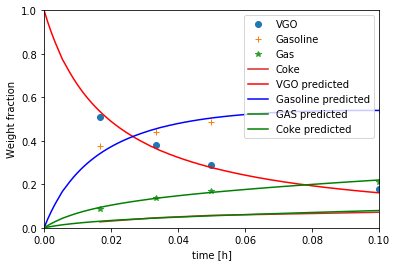

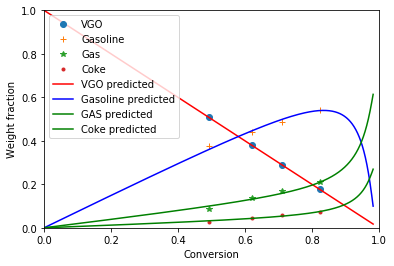

 The parameters computed are :
 k_12 =  38.98367907031659 
 k_13 =  9.998673480066195 
 k_14 =  3.1211829845819348 
 k_23 =  1.313842952484009 
 k_24 =  0.6512342913034368

 The covariance is array is : 
 [[ 2.46424514 -0.17984988 -0.29506762  0.26521872  0.23601352]
 [-0.17984988  1.55535318 -0.44990207 -0.61792867  0.2584277 ]
 [-0.29506762 -0.44990207  1.43629685  0.28256616 -0.62097623]
 [ 0.26521872 -0.61792867  0.28256616  0.36303764 -0.17331066]
 [ 0.23601352  0.2584277  -0.62097623 -0.17331066  0.36366022]]


In [34]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 23 10:24:42 2018

@author: Clement
"""
#   Computational assignment n°4 - Four-lump model (Python code)
#
#   This code is design to find a value for differential equations by
#   comparison to experimental data. The model study is the four lump
#   model.
#
#   @ Autor Clement Brousse (clbrous@okstate.edu)
#   This code has been partially adapted from exemples written by Dr Ford
#   Versypt at the OSU.
#
#   The equations solved are
#   $\frac{dy_1}{dt}=-(k_12+k_13+k_14)y_1^2$
#   $\frac{dy_2}{dt}=k_12*y_1^2-k_23*y_2-k_24y_2$
#   $\frac{dy_3}{dt}=k_13*y_1^2+k_23*y_2$
#   $\frac{dy_4}{dt}=k_14*y_1^2+k_24*y_2$
#
#   The initials conditions are the followings :
#   $y_1(0)=1$
#   $y_2(0)=0$
#   $y_3(0)=0$
#   $y_4(0)=0$
#
#   The input values neededs as input are the experimental values and the
#   initial conditions.
#   This script return the values of $k_1$, $k_2$, $k_3$ and $k_4$.
#   This script also return the plot of the wheight fraction according 
#   to the time and the wheight fraction according to the conversion.
#
# Import all dependencies
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Import the data
tdata = np.array([1/60, 1/30, 1/20, 1/10])
cdata = np.array([0.4926, 0.6204, 0.7118, 0.8238])
ydata = np.array([[0.5074, 0.3796, 0.2882, 0.1762],[0.3767, 0.4385, 0.4865, 0.5416],[0.0885, 0.136, 0.1681, 0.2108],[ 0.0274, 0.0459, 0.0572, 0.0714]])

# Guess for the parameters
k = np.zeros((5,1))
k[0] = 1               # k_12
k[1] = 0               # k_13
k[2] = 0               # k_14
k[3] = 0               # k_23
k[4] = 0               # k_24
parameterGuesses = k

# Initial conditions
y0 = np.zeros((4,1))
y0[0] = 1               # y_1
y0[1] = 0               # y_2
y0[2] = 0               # y_3
y0[3] = 0               # y_4
y0=np.array([1,0,0,0])

# Define the ODE
def four_lump_eq(y,t,args):
    k_12 = args [0]
    k_13 = args [1]
    k_14 = args [2]
    k_23 = args [3]
    k_24 = args [4]
    dy1dt = -(k_12 + k_13+k_14)*y[0]**2
    dy2dt = k_12 *y[0]**2 - k_23*y[1]-k_24*y[1]
    dy3dt = k_13*y[0]**2 + k_23*y[1]
    dy4dt = k_14*y[0]**2 + k_24*y[1]
    return dy1dt, dy2dt, dy3dt, dy4dt

# Define the solveur
def four_lump_sol(tdata, *params):
    y_output = np.zeros((tdata.size, numYaxisVariables))
    for i in np.arange(0, len(tdata)):
        t_increment = 0.0001       # Adjust according to the needs
        tspan = np.arange(0,tdata[i]+t_increment,t_increment)
        y_calc = odeint(four_lump_eq, y0, tspan, args = (params,))
        y_output[i,:] = y_calc[-1,:]
    y_output = np.transpose(y_output)
    y_output = np.ravel(y_output)
    return y_output

numYaxisVariables = 4
# launch the curve fit
parametersoln, pcov = curve_fit(four_lump_sol,tdata,np.ravel(ydata),p0=parameterGuesses)

# Plot the Weight fraction according to the time [h]
plt.plot(tdata, ydata[0,:], 'o')
plt.plot(tdata, ydata[1,:], '+')
plt.plot(tdata, ydata[2,:], '*')
plt.plot(tdata, ydata[3,:], '-')
tforPloting = np.linspace(0, tdata[-1]+1, 1001)
y_calculated = four_lump_sol(tforPloting,*parametersoln)
y_calculated = np.reshape (y_calculated, (numYaxisVariables, tforPloting.size))
plt.plot(tforPloting, y_calculated [0,:], 'r-', label = 'y_1 predicted')
plt.plot(tforPloting, y_calculated [1,:], 'b-', label = 'y_2 predicted')
plt.plot(tforPloting, y_calculated [2,:], 'g-', label = 'y_3 predicted')
plt.plot(tforPloting, y_calculated [3,:], 'g-', label = 'y_4 predicted')
plt.legend(('VGO', 'Gasoline', 'Gas', 'Coke', 'VGO predicted', 'Gasoline predicted', 'GAS predicted', 'Coke predicted'))
axes = plt.gca()
axes.set_xlim([0,0.1])
axes.set_ylim([0,1])
plt.xlabel('time [h]')
plt.ylabel('Weight fraction')
plt.show()

# Plot the weight fraction according to the conversion
plt.plot(cdata, ydata[0,:], 'o')
plt.plot(cdata, ydata[1,:], '+')
plt.plot(cdata, ydata[2,:], '*')
plt.plot(cdata, ydata[3,:], '.')
cforPloting = 1-y_calculated[0,:]
plt.plot(cforPloting, y_calculated [0,:], 'r-')
plt.plot(cforPloting, y_calculated [1,:], 'b-')
plt.plot(cforPloting, y_calculated [2,:], 'g-')
plt.plot(cforPloting, y_calculated [3,:], 'g-')
plt.legend(('VGO', 'Gasoline', 'Gas', 'Coke', 'VGO predicted', 'Gasoline predicted', 'GAS predicted', 'Coke predicted'))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.xlabel('Conversion')
plt.ylabel('Weight fraction')
plt.show()

# Return the computed parameters and covariance
print(' The parameters computed are :\n k_12 = ', parametersoln[0], '\n k_13 = ', parametersoln[1],'\n k_14 = ', parametersoln[2],'\n k_23 = ', parametersoln[3],'\n k_24 = ', parametersoln[4])
print('\n The covariance is array is : \n', pcov)